# Data Analysis of S&P 500 to be Used on Food Cost Trend Data

The data analysis in this notebook is temporarily performed on S&P 500 data from 2022-2023 in place of the food cost trend data we are hoping to get ahold of from the Food and Agriculture Association of the United Nations. 

Our plan is to perform predictions on the difference between the trend and the real trend (the residuals) in order to predict future deviations of the real trend from the predicted trend. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_2023 = pd.read_csv('../data/INDEX_US_S&P US_SPX_2023.csv')
data_2022 = pd.read_csv('../data/INDEX_US_S&P US_SPX_2022.csv')
data = pd.concat([data_2023, data_2022], axis=0)

In [7]:
# Convert Close coloumn to float
data['Close'] = data['Close'].str.replace(',', '')
data['Close'] = data['Close'].astype(float)

# Convert Date coloumn to datetime
data['Date'] = pd.to_datetime(data['Date'])

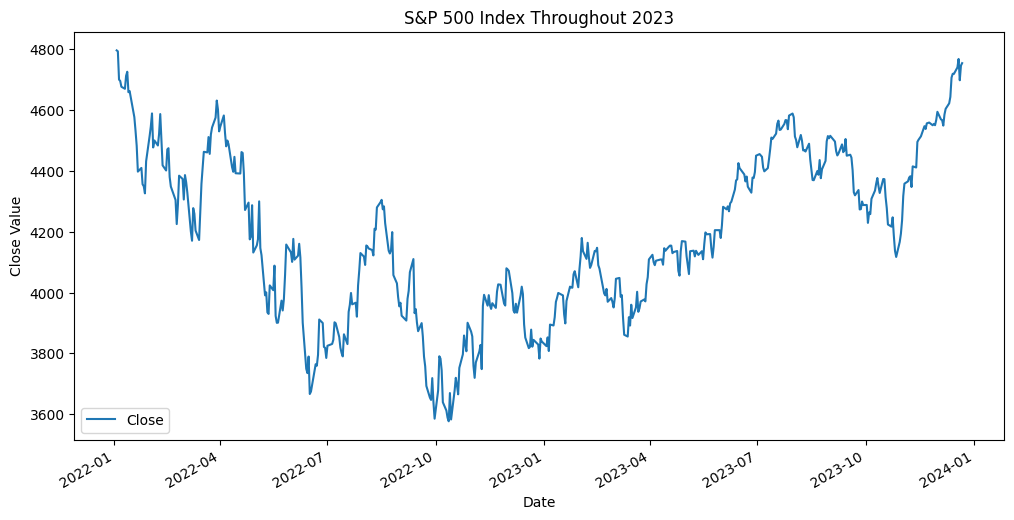

In [8]:
# Make a line plot of the 'Close' column against the date column 
data.plot(x='Date', y='Close', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('S&P 500 Index Throughout 2023')
plt.show()

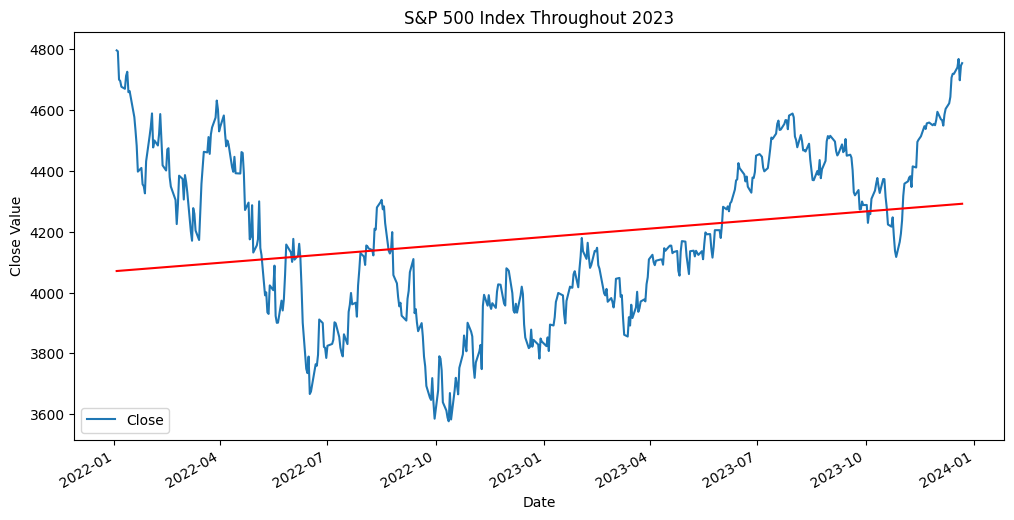

In [9]:
# Make a line plot of the 'Close' column against the date column with a trendline
data.plot(x='Date', y='Close', figsize=(12, 6))
days = (data['Date'] - data['Date'].min()).dt.days
slope, intercept = np.polyfit(days, data['Close'], 1)
trend_line = slope * days + intercept
plt.plot(data['Date'], trend_line, label='Trend Line', color='red')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('S&P 500 Index Throughout 2023')
plt.show()

In [ ]:
# Calculate the MAE of the trendline
mae = np.mean(np.abs(data['Close'] - trend_line))
print('The MAE of the trendline is:', mae)

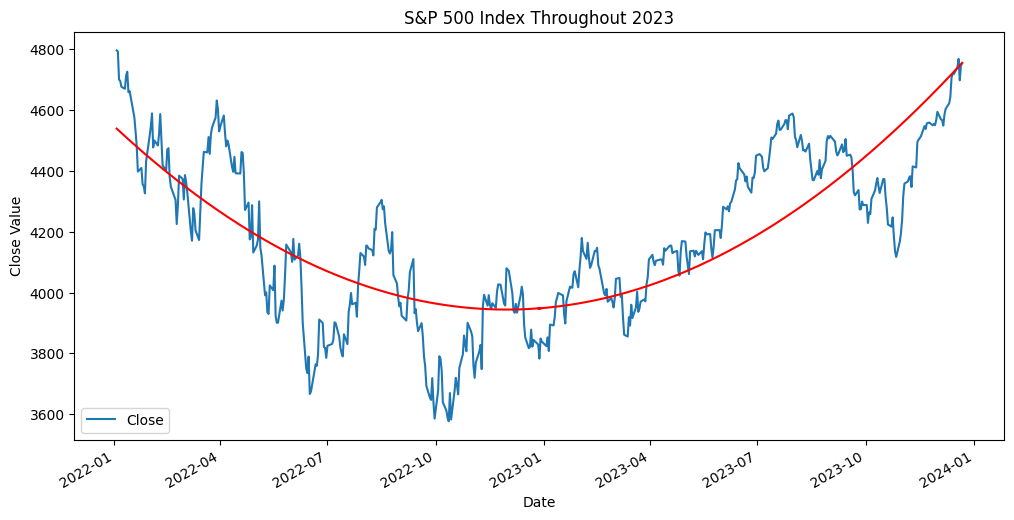

In [10]:
# Make a line plot of the 'Close' column against the date column with a non-linear 6-degree trendline
data.plot(x='Date', y='Close', figsize=(12, 6))
days = (data['Date'] - data['Date'].min()).dt.days
curve_fit = np.polyfit(days, data['Close'], 2)
trend_line = curve_fit[0] * days ** 2 + curve_fit[1] * days + curve_fit[2]
plt.plot(data['Date'], trend_line, label='Trend Line', color='red')
plt.xlabel('Date')  
plt.ylabel('Close Value')
plt.title('S&P 500 Index Throughout 2023')
plt.show()


In [ ]:
# Calculate the MAE of the trendline
mae = np.mean(np.abs(data['Close'] - trend_line))
print('The MAE of the trendline is:', mae)

In [11]:
# Save the value of the trendline at each data point in a new column
data['Trend'] = trend_line

# Calculate the residuals by subtracting the trendline from the close value
data['Residuals'] = data['Close'] - data['Trend']

data.head()


,Date,Open,High,Low,Close,Trend,Residuals
0,2023-12-22,"4,753.92","4,772.94","4,736.77",4754.63,4755.523389,-0.893389
1,2023-12-21,"4,724.29","4,748.71","4,708.35",4746.75,4751.334223,-4.584223
2,2023-12-20,"4,764.73","4,778.01","4,697.82",4698.35,4747.155904,-48.805904
3,2023-12-19,"4,743.72","4,768.69","4,743.72",4768.37,4742.988430,25.381570
4,2023-12-18,"4,725.58","4,749.52","4,725.58",4740.56,4738.831801,1.728199


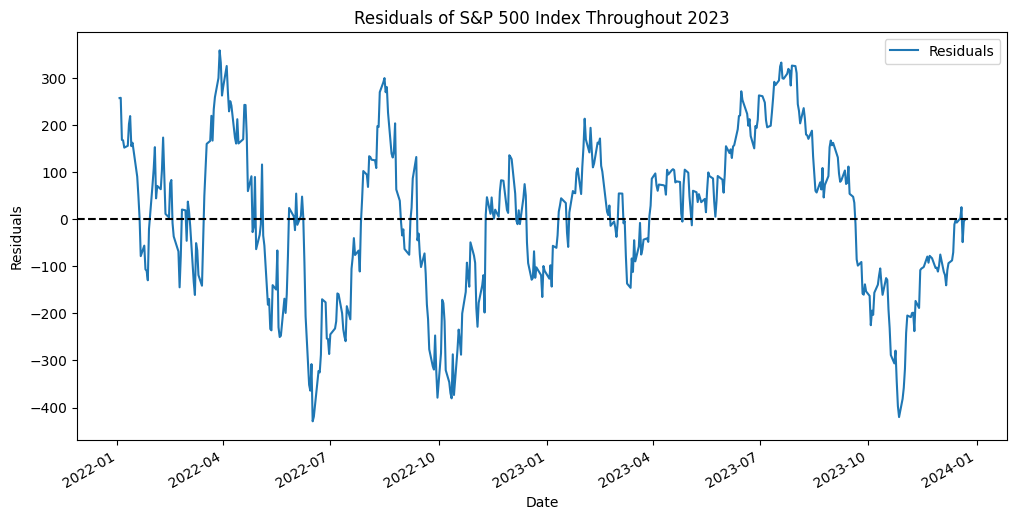

In [12]:
# Plot the residuals against the date column
data.plot(x='Date', y='Residuals', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of S&P 500 Index Throughout 2023')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()
